In [1]:
import pandas as pd
import os
import sklearn
import re
import numpy as np
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

sklearn.exceptions.ConvergenceWarning('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.preprocessing import MinMaxScaler

In [3]:
current_path = os.getcwd()
data_sources = os.path.join(current_path, '..', 'Data Sources')

In [50]:
#datasets we're using
real_estate = pd.read_csv(os.path.join(data_sources, 'RealEstate_Sample_Wards.csv'))
real_estate.rename(columns={"Ward_Index": "Ward_ID"},inplace=True)
real_estate['Ward_ID'] = real_estate['Ward_ID'].fillna(-1) #to fill any missing values
real_estate['Ward_ID'] = real_estate['Ward_ID'].astype(int)

In [51]:
# Summarize the dataset
print("Dataset Summary:")
print(real_estate.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(real_estate.isnull().sum())  # Check for missing values
print("\nData Types:")
print(real_estate.dtypes)  # Data types of each column

Dataset Summary:
             Geo_Id  Est_Const_Cost      Ward_ID
count  7.729000e+03    7.782000e+03  7782.000000
mean   5.544786e+06    6.142292e+06    11.706759
std    7.792298e+06    2.325983e+07     7.016796
min    1.658700e+04    5.005500e+05    -1.000000
25%    5.291640e+05    7.000000e+05     4.000000
50%    9.873240e+05    8.602450e+05    12.000000
75%    8.393480e+06    1.300000e+06    17.000000
max    3.013581e+07    6.000000e+08    24.000000

Missing Values in Each Column:
Permit_Num             0
Permit_Type            0
Structure_Type         0
Work                   0
Street_Num             0
Street_Name            0
Street_Type            0
Street_Direction       0
Postal                 0
Geo_Id                53
Ward_Grid              0
Application_Date       0
Issued_Date            0
Completed_Date      4419
Status                 0
Description            5
Est_Const_Cost         0
Address                0
Coordinates           42
Ward_ID                0
Ward      

In [52]:
transportation = pd.read_csv(os.path.join(data_sources, 'Transportation_Sample_Wards.csv'))
transportation.rename(columns={"Ward_Index": "Ward_ID"},inplace=True)
transportation['Ward_ID'] = transportation['Ward_ID'].fillna(-1)
transportation['Ward_ID'] = transportation['Ward_ID'].astype(int)

# Function to safely extract longitude and latitude from the 'Coordinates' column
def extract_longitude(x):
    if isinstance(x, str):
        match = re.findall(r"\(([^ ]+)", x)
        if match:
            return float(match[0])
    return None  # Return None or a default value if the extraction is not possible

def extract_latitude(x):
    if isinstance(x, str):
        match = re.findall(r" ([^ ]+)\)", x)
        if match:
            return float(match[0])
    return None

# Apply the functions to the 'Coordinates' column
transportation['Longitude'] = transportation['Coordinates'].apply(extract_longitude)
transportation['Latitude'] = transportation['Coordinates'].apply(extract_latitude)

In [ ]:
# Summarize the dataset
print("Dataset Summary:")
print(transportation.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(transportation.isnull().sum())  # Check for missing values
print("\nData Types:")
print(transportation.dtypes)  # Data types of each column

In [ ]:
amenities = pd.read_csv(os.path.join(data_sources, 'Amenities_Sample_Ward.csv'))
amenities.rename(columns={"Ward_Index": "Ward_ID"},inplace=True)
amenities['Ward_ID'] = amenities['Ward_ID'].fillna(-1)
amenities['Ward_ID'] = amenities['Ward_ID'].astype(int)

In [ ]:
# Summarize the dataset
print("Dataset Summary:")
print(amenities.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(amenities.isnull().sum())  # Check for missing values
print("\nData Types:")
print(amenities.dtypes)  # Data types of each column

In [ ]:
social_dev = pd.read_csv(os.path.join(data_sources, 'Social_Development_Sample_Wards.csv'))
social_dev.rename(columns={"Ward_Index": "Ward_ID"},inplace=True)
social_dev['Ward_ID'] = social_dev['Ward_ID'].fillna(-1)
social_dev['Ward_ID'] = social_dev['Ward_ID'].astype(int)

In [ ]:
# Summarize the dataset
print("Dataset Summary:")
print(social_dev.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(social_dev.isnull().sum())  # Check for missing values
print("\nData Types:")
print(social_dev.dtypes)  # Data types of each column

In [53]:
#data cleaning from Phase 2
education_data2016 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2016.csv"),
    skiprows=range(833),
    nrows=16,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)
education_data2021 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2021.csv"),
    skiprows=range(978),
    nrows=17,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)

# rename 'Education' column to 'Education_Level' before melting
education_data2016.rename(columns={"Education": "Education_Level"}, inplace=True)
education_data2021.rename(columns={"Education": "Education_Level"}, inplace=True)

# filter out rows where 'Education_Level' column is not empty
education_data2016 = education_data2016[education_data2016["Education_Level"].notna()]
education_data2021 = education_data2021[education_data2021["Education_Level"].notna()]

# remove all spaces in education_level column
education_data2016["Education_Level"] = education_data2016[
    "Education_Level"
].str.strip()
education_data2021["Education_Level"] = education_data2021[
    "Education_Level"
].str.strip()

# Melt the DataFrame to get 'Ward_ID', 'Education_Level', and 'Population' columns
education_data2016 = pd.melt(
    education_data2016,
    id_vars=["Education_Level"],
    var_name="Ward_ID",
    value_name="Population",
)
education_data2016["Year"] = 2016
education_data2021 = pd.melt(
    education_data2021,
    id_vars=["Education_Level"],
    var_name="Ward_ID",
    value_name="Population",
)
education_data2021["Year"] = 2021

# merge the datasets
Education = pd.concat(
    [education_data2016, education_data2021], ignore_index=True
)

# change data types
Education["Population"] = Education["Population"].astype(int)
Education["Education_Level"] = Education["Education_Level"].astype(
    str
)

In [54]:
# Summarize the dataset
print("Dataset Summary:")
print(Education.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(Education.isnull().sum())  # Check for missing values
print("\nData Types:")
print(Education.dtypes)  # Data types of each column

Dataset Summary:
         Population         Year
count  8.060000e+02   806.000000
mean   3.642121e+04  2018.580645
std    1.516853e+05     2.500250
min    2.100000e+02  2016.000000
25%    2.180000e+03  2016.000000
50%    1.053750e+04  2021.000000
75%    2.525125e+04  2021.000000
max    2.377950e+06  2021.000000

Missing Values in Each Column:
Education_Level    0
Ward_ID            0
Population         0
Year               0
dtype: int64

Data Types:
Education_Level    object
Ward_ID            object
Population          int64
Year                int64
dtype: object


In [55]:
# INDUSTRY DIMENSION
industry_data2016 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2016.csv"),
    skiprows=range(1176),
    nrows=22,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)
industry_data2021 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2021.csv"),
    skiprows=range(1310),
    nrows=22,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)

# Filter out rows where 'Industry' column is not empty
industry_data2016 = industry_data2016[industry_data2016["Industry"].notna()]
industry_data2021 = industry_data2021[industry_data2021["Industry"].notna()]

# Removing the numbers and spaces before each industry type
industry_data2016["Industry"] = industry_data2016["Industry"].str.strip()
industry_data2021["Industry"] = industry_data2021["Industry"].str.strip()
industry_data2016["Industry"] = industry_data2016["Industry"].str.replace(
    r"^\s*\d+(-\d+)?\s+", "", regex=True
)
industry_data2021["Industry"] = industry_data2021["Industry"].str.replace(
    r"^\s*\d+(-\d+)?\s+", "", regex=True
)

# Melt the DataFrame to get 'Ward_ID', 'Industry', and 'Population' columns
industry_data2016 = pd.melt(
    industry_data2016, id_vars=["Industry"], var_name="Ward_ID", value_name="Population"
)
industry_data2016["Year"] = 2016
industry_data2021 = pd.melt(
    industry_data2021, id_vars=["Industry"], var_name="Ward_ID", value_name="Population"
)
industry_data2021["Year"] = 2021

# merge the datasets
Industry = pd.concat([industry_data2016, industry_data2021], ignore_index=True)

# change data types
Industry["Population"] = Industry["Population"].astype(int)
Industry["Ward_ID"] = Industry["Ward_ID"].astype(str)
Industry["Industry"] = Industry["Industry"].astype(str)

In [ ]:
# Summarize the dataset
print("Dataset Summary:")
print(Industry.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(Industry.isnull().sum())  # Check for missing values
print("\nData Types:")
print(Industry.dtypes)  # Data types of each column

In [ ]:
# INCOME DIMENSION
income_data2016 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2016.csv"),
    skiprows=range(1252),
    nrows=17,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)
income_data2021 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2021.csv"),
    skiprows=range(1389),
    nrows=17,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)

# Filter out rows where 'Income' column is not NA
income_data2016 = income_data2016[income_data2016["Income"].notna()]
income_data2021 = income_data2021[income_data2021["Income"].notna()]

# change value of one of income ranges
income_data2016.loc[
    income_data2016["Income"].str.contains("Total - Total income groups"), "Income"
] = "Total Income Groups"
income_data2021.loc[
    income_data2021["Income"].str.contains("Total - Total Income groups"), "Income"
] = "Total Income Groups"

# Removing the spaces before each income
income_data2016["Income"] = income_data2016["Income"].str.strip()
income_data2021["Income"] = income_data2021["Income"].str.strip()

# Melt the DataFrame to get 'Ward_ID', 'Income', and 'Population' columns
income_data2016["Year"] = 2016
income_data2021["Year"] = 2021
income_data2016 = pd.melt(
    income_data2016,
    id_vars=["Income", "Year"],
    var_name="Ward_ID",
    value_name="Population",
)
income_data2021 = pd.melt(
    income_data2021,
    id_vars=["Income", "Year"],
    var_name="Ward_ID",
    value_name="Population",
)
columns_order = [col for col in income_data2016.columns if col != "Year"] + ["Year"]
income_data2016 = income_data2016[columns_order]
income_data2021 = income_data2021[columns_order]

# merge the datasets
Income = pd.concat([income_data2016, income_data2021], ignore_index=True)

# change data types
Income["Population"] = Income["Population"].astype(int)
Income["Ward_ID"] = Income["Ward_ID"].astype(str)
Income["Income"] = Income["Income"].astype(str)

In [ ]:
# Summarize the dataset
print("Dataset Summary:")
print(Income.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(Income.isnull().sum())  # Check for missing values
print("\nData Types:")
print(Income.dtypes)  # Data types of each column

In [4]:
# ETHNOCULTURAL DIMENSION
ethnicity_data2016 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2016.csv"),
    skiprows=range(851),
    nrows=280,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)
ethnicity_data2021 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2021.csv"),
    skiprows=range(1013),
    nrows=252,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)

# Filter out rows where 'Ethnocultural' column is not NA
ethnicity_data2016 = ethnicity_data2016[ethnicity_data2016["Ethnoculture"].notna()]
ethnicity_data2021 = ethnicity_data2021[ethnicity_data2021["Ethnoculture"].notna()]

# change value of one of ethnic ranges
ethnicity_data2016.loc[
    ethnicity_data2016["Ethnoculture"].str.contains("Total - Ethnic origin"),
    "Ethnoculture",
] = "Total Ethnic Origin"
ethnicity_data2021.loc[
    ethnicity_data2021["Ethnoculture"].str.contains("Total - Ethnic origin"),
    "Ethnoculture",
] = "Total Ethnic Origin"

# Removing the spaces before each ethnicity
ethnicity_data2016["Ethnoculture"] = ethnicity_data2016["Ethnoculture"].str.strip()
ethnicity_data2021["Ethnoculture"] = ethnicity_data2021["Ethnoculture"].str.strip()

# Melt the DataFrame to get 'Ward_ID', 'Ethnocultural', and 'Population' columns
ethnicity_data2016["Year"] = 2016
ethnicity_data2021["Year"] = 2021
ethnicity_data2016 = pd.melt(
    ethnicity_data2016,
    id_vars=["Ethnoculture", "Year"],
    var_name="Ward_ID",
    value_name="Population",
)
ethnicity_data2021 = pd.melt(
    ethnicity_data2021,
    id_vars=["Ethnoculture", "Year"],
    var_name="Ward_ID",
    value_name="Population",
)
columns_order = [col for col in ethnicity_data2016.columns if col != "Year"] + ["Year"]
ethnicity_data2016 = ethnicity_data2016[columns_order]
ethnicity_data2021 = ethnicity_data2021[columns_order]

# merge the datasets
Ethnocultural = pd.concat(
    [ethnicity_data2016, ethnicity_data2021], ignore_index=True
)

# change data types
Ethnocultural["Population"] = Ethnocultural["Population"].astype(int)
Ethnocultural["Ward_ID"] = Ethnocultural["Ward_ID"].astype(str)
Ethnocultural["Ethnoculture"] = Ethnocultural["Ethnoculture"].astype(str)

In [61]:
# Summarize the dataset
print("Dataset Summary:")
print(Ethnocultural.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(Ethnocultural.isnull().sum())  # Check for missing values
print("\nData Types:")
print(Ethnocultural.dtypes)  # Data types of each column

Dataset Summary:
         Population          Year
count  1.378000e+04  13780.000000
mean   2.880862e+03   2018.367925
std    3.899195e+04      2.496599
min    0.000000e+00   2016.000000
25%    2.000000e+01   2016.000000
50%    1.000000e+02   2016.000000
75%    4.862500e+02   2021.000000
max    2.761285e+06   2021.000000

Missing Values in Each Column:
Ethnoculture    0
Ward_ID         0
Population      0
Year            0
dtype: int64

Data Types:
Ethnoculture    object
Ward_ID         object
Population       int64
Year             int64
dtype: object


In [ ]:
# HOUSEHOLD DIMENSION
household_data2016 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2016.csv"),
    skiprows=range(98),
    nrows=9,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)
household_data2021 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2021.csv"),
    skiprows=range(108),
    nrows=9,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)

# Filter out rows where 'Household' column is not NA
household_data2016 = household_data2016[household_data2016["Household"].notna()]
household_data2021 = household_data2021[household_data2021["Household"].notna()]

# change value of one of income ranges
household_data2016.loc[
    household_data2016["Household"].str.contains(
        "Total - Private households by household"
    ),
    "Household",
] = "Total Household"
household_data2021.loc[
    household_data2021["Household"].str.contains(
        "Total - Private households by household"
    ),
    "Household",
] = "Total Household"


# Removing the spaces before each household type
household_data2016["Household"] = household_data2016["Household"].str.strip()
household_data2021["Household"] = household_data2021["Household"].str.strip()

# Melt the DataFrame to get 'Ward_ID', 'Household', and 'Population' columns
household_data2016["Year"] = 2016
household_data2021["Year"] = 2021
household_data2016 = pd.melt(
    household_data2016,
    id_vars=["Household", "Year"],
    var_name="Ward_ID",
    value_name="Population",
)
household_data2021 = pd.melt(
    household_data2021,
    id_vars=["Household", "Year"],
    var_name="Ward_ID",
    value_name="Population",
)
columns_order = [col for col in household_data2016.columns if col != "Year"] + ["Year"]
household_data2016 = household_data2016[columns_order]
household_data2021 = household_data2021[columns_order]

# Merge the datasets
Household = pd.concat(
    [household_data2016, household_data2021], ignore_index=True
)

# change data types
Household["Ward_ID"] = Household["Ward_ID"].astype(str)
Household["Household"] = Household["Household"].astype(str)

# rename column
Household.rename(columns={"Household": "Household_Description"}, inplace=True)

In [ ]:
# Summarize the dataset
print("Dataset Summary:")
print(Household.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(Household.isnull().sum())  # Check for missing values
print("\nData Types:")
print(Household.dtypes)  # Data types of each column

In [ ]:
# SHELTER DIMENSION
# 2021
# Load the CSV file
df = pd.read_csv(os.path.join(data_sources,"WardProfile2021.csv"), encoding="ISO-8859-1", low_memory=False)

# Define the indices
tenant_costs_index = 1373
owner_costs_index = 1377

tenant_percent_spending = 1374
owner_percent_spending = 1378

tenant_households = 1372
owner_households = 1376

# create the Ward_IDs list based on the column headers
ward_ids = df.columns[1:]

tenant_data = []
owner_data = []

for i, ward_id in enumerate(ward_ids):
    tenant_data.append(
        {
            "Household_Type": "Tenant",
            "Ward_ID": ward_id,
            "Total_Households": df.iloc[tenant_households, i + 1],
            "Average_Monthly_Shelter_Costs": df.iloc[tenant_costs_index, i + 1],
            "Percent_Spending_30_Percent_Or_More_On_Shelter": df.iloc[
                tenant_percent_spending, i + 1
            ],
        }
    )
    owner_data.append(
        {
            "Household_Type": "Owner",
            "Ward_ID": ward_id,
            "Total_Households": df.iloc[owner_households, i + 1],
            "Average_Monthly_Shelter_Costs": df.iloc[owner_costs_index, i + 1],
            "Percent_Spending_30_Percent_Or_More_On_Shelter": df.iloc[
                owner_percent_spending, i + 1
            ],
        }
    )

# Combine the tenant and owner data
combined_data = tenant_data + owner_data
# print(combined_data[:20])
# 2016
# Load the CSV file
df1 = pd.read_csv(os.path.join(data_sources,"WardProfile2021.csv"), encoding="ISO-8859-1", low_memory=False)

# Define the indices
tenant_costs_index = 1239
owner_costs_index = 1243

tenant_percent_spending = 1240
owner_percent_spending = 1244

tenant_households = 1238
owner_households = 1242

# Create the Ward_IDs list based on the column headers
ward_ids = df1.columns[1:]

tenant_data = []
owner_data = []

for i, ward_id in enumerate(ward_ids):
    tenant_data.append(
        {
            "Household_Type": "Tenant",
            "Ward_ID": ward_id,
            "Total_Households": df1.iloc[tenant_households, i + 1],
            "Average_Monthly_Shelter_Costs": df1.iloc[tenant_costs_index, i + 1],
            "Percent_Spending_30_Percent_Or_More_On_Shelter": df1.iloc[
                tenant_percent_spending, i + 1
            ],
        }
    )
    owner_data.append(
        {
            "Household_Type": "Owner",
            "Ward_ID": ward_id,
            "Total_Households": df1.iloc[owner_households, i + 1],
            "Average_Monthly_Shelter_Costs": df1.iloc[owner_costs_index, i + 1],
            "Percent_Spending_30_Percent_Or_More_On_Shelter": df1.iloc[
                owner_percent_spending, i + 1
            ],
        }
    )
# Combine the tenant and owner data
combined_data2 = tenant_data + owner_data
# print(combined_data2[:20])
# create the DataFrame
ShelterDimension2016 = pd.DataFrame(combined_data2)
ShelterDimension2021 = pd.DataFrame(combined_data)

ShelterDimension2016["Year"] = 2016
ShelterDimension2021["Year"] = 2021

# merge the datasets
Shelter = pd.concat(
    [ShelterDimension2016, ShelterDimension2021], ignore_index=True
)

# clean data and change data types
Shelter["Average_Monthly_Shelter_Costs"] = (
    Shelter["Average_Monthly_Shelter_Costs"]
    .str.replace("$", "")
    .str.replace(",", "")
    .astype(int)
)
Shelter["Percent_Spending_30_Percent_Or_More_On_Shelter"] = (
    Shelter["Percent_Spending_30_Percent_Or_More_On_Shelter"]
    .str.replace("%", "")
    .astype(float)
)
Shelter["Total_Households"] = Shelter["Total_Households"].astype(int)
Shelter["Household_Type"] = Shelter["Household_Type"].astype(str)
Shelter["Ward_ID"] = Shelter["Ward_ID"].astype(str)


In [ ]:
# Summarize the dataset
print("Dataset Summary:")
print(Shelter.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(Shelter.isnull().sum())  # Check for missing values
print("\nData Types:")
print(Shelter.dtypes)  # Data types of each column

In [ ]:
# DEMOLITION DIMENSION

demolition = pd.read_csv(os.path.join(data_sources, 'DemolitionDimension_Sample.csv'))
demolition.rename(columns={"Ward_Index": "Ward_ID"},inplace=True)
demolition['Ward_ID'] = demolition['Ward_ID'].fillna(-1)
demolition['Ward_ID'] = demolition['Ward_ID'].astype(int)

In [ ]:
# Summarize the dataset
print("Dataset Summary:")
print(demolition.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(demolition.isnull().sum())  # Check for missing values
print("\nData Types:")
print(demolition.dtypes)  # Data types of each column

In [ ]:
# BUILDING PERMIT DIMENSION

# Load the CSV file into a DataFrame
BuildingPermit = pd.read_csv(os.path.join(data_sources, 'BuildingPermitDimension.csv'))

In [ ]:
# Summarize the dataset
print("Dataset Summary:")
print(BuildingPermit.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(BuildingPermit.isnull().sum())  # Check for missing values
print("\nData Types:")
print(BuildingPermit.dtypes)  # Data types of each column

In [ ]:
# VISUALIZING REAL ESTATE

# Number of permit applications or completions over time
real_estate['Application_Date'] = pd.to_datetime(real_estate['Application_Date'])
real_estate['Issued_Date'] = pd.to_datetime(real_estate['Issued_Date'])
real_estate['Completed_Date'] = pd.to_datetime(real_estate['Completed_Date'])

monthly_applications = real_estate.resample('M', on='Application_Date').size()

plt.figure(figsize=(12, 6))
monthly_applications.plot()
plt.title('Monthly Permit Applications Over Time')
plt.xlabel('Application Date')
plt.ylabel('Number of Applications')
plt.show()

# Permit processing time (in days)
real_estate['Processing_Time_Days'] = (real_estate['Issued_Date'] - real_estate['Application_Date']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(real_estate['Processing_Time_Days'], bins=30, kde=True)
##do we have enough bins?
plt.title('Permit Processing Time')
plt.xlabel('Processing Time (Days)')
plt.ylabel('Frequency')
plt.show()

# Estimated Construction Costs
plt.figure(figsize=(10, 6))
sns.histplot(real_estate['Est_Const_Cost'], bins=30, kde=True)
plt.title('Estimated Construction Costs')
plt.xlabel('Estimated Construction Cost')
plt.ylabel('Frequency')
plt.show()



In [ ]:
# VISUALIZING TRANSPORTATION

# Distribution of Work Types
plt.figure(figsize=(12, 6))
sns.countplot(y='Work', data=transportation, order = transportation['Work'].value_counts().index)
plt.title('Distribution of Types of Work on Transportation Infrastructure')
plt.xlabel('Count')
plt.ylabel('Type of Work')
plt.show()

# Processing time between application and issue dates
transportation['Application_Date'] = pd.to_datetime(transportation['Application_Date'])
transportation['Issued_Date'] = pd.to_datetime(transportation['Issued_Date'])
transportation['Processing_Time_Days'] = (transportation['Issued_Date'] - transportation['Application_Date']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(transportation['Processing_Time_Days'], bins=30, kde=True)
plt.title('Permit Processing Time for Transportation Projects')
plt.xlabel('Processing Time (Days)')
plt.ylabel('Frequency')
plt.show()

# Construction Cost Distribution by Structure Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Est_Const_Cost', y='Structure_Type', data=transportation)
plt.title('Construction Cost Distribution by Structure Type')
plt.xlabel('Estimated Construction Cost')
plt.ylabel('Structure Type')
plt.show()


In [ ]:
# VISUALIZING AMENITIES

# Geographical Distribution of Amenities
def extract_longitude(x):
    if isinstance(x, str):
        match = re.findall(r"\(([^ ]+)", x)
        if match:
            return float(match[0])
    return None

def extract_latitude(x):
    if isinstance(x, str):
        match = re.findall(r" ([^ ]+)\)", x)
        if match:
            return float(match[0])
    return None

amenities['Longitude'] = amenities['Coordinates'].apply(extract_longitude)
amenities['Latitude'] = amenities['Coordinates'].apply(extract_latitude)

# Geographical Distribution of Amenities
plt.figure(figsize=(8, 4))  # Adjusted to make the plot smaller
plt.scatter(amenities['Longitude'], amenities['Latitude'], alpha=0.5)
plt.title('Geographical Distribution of Amenities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Distribution of Amenities by Structure Type

plt.figure(figsize=(12, 6))
sns.countplot(y='Structure_Type', data=amenities, order=amenities['Structure_Type'].value_counts().index)
plt.title('Distribution of Amenities by Structure Type')
plt.xlabel('Count')
plt.ylabel('Structure Type')
plt.show()

# Yearly Permit Applications for Amenities Over Time
amenities['Application_Date'] = pd.to_datetime(amenities['Application_Date'])
yearly_applications = amenities.resample('Y', on='Application_Date').size()

plt.figure(figsize=(12, 6))
yearly_applications.plot(marker='o')
plt.title('Yearly Permit Applications for Amenities Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Applications')
plt.show()


In [ ]:
# VISUALIZING SOCIAL DEVELOPMENT

# Extract longitude and latitude
def extract_longitude(x):
    if isinstance(x, str):
        match = re.findall(r"\(([^ ]+)", x)
        if match:
            return float(match[0])
    return None

def extract_latitude(x):
    if isinstance(x, str):
        match = re.findall(r" ([^ ]+)\)", x)
        if match:
            return float(match[0])
    return None

social_dev['Longitude'] = social_dev['Coordinates'].apply(extract_longitude)
social_dev['Latitude'] = social_dev['Coordinates'].apply(extract_latitude)

# Create a smaller plot for the geographical distribution of social development projects
plt.figure(figsize=(8, 4))  # Adjusted for a more compact display
plt.scatter(social_dev['Longitude'], social_dev['Latitude'], alpha=0.5, marker='o')
plt.title('Compact Geographical Distribution of Social Development Projects')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)  # Optional: Adds a grid for easier visualization
plt.tight_layout()  # Adjust layout to avoid cutting off labels
plt.show()

# Distribution of Social Development Projects by Structure Type
plt.figure(figsize=(8, 4))  # Smaller figure size
sns.countplot(y='Structure_Type', data=social_dev, order=social_dev['Structure_Type'].value_counts().index)
plt.title('Distribution of Social Development Projects by Structure Type')
plt.xlabel('Count')
plt.ylabel('Structure Type')
plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()

# Estimated Construction Cost Analysis
plt.figure(figsize=(8, 4))  # Smaller figure size
sns.boxplot(x='Est_Const_Cost', y='Structure_Type', data=social_dev)
plt.title('Construction Cost Distribution by Social Infrastructure Type')
plt.xlabel('Estimated Construction Cost')
plt.ylabel('Infrastructure Type')
plt.tight_layout()
plt.show()

# Yearly Permit Applications for Social Development Projects Over Time
social_dev['Application_Date'] = pd.to_datetime(social_dev['Application_Date'])
yearly_applications = social_dev.resample('Y', on='Application_Date').size()

plt.figure(figsize=(8, 4))  # Adjusted for a smaller plot
yearly_applications.plot(marker='o')
plt.title('Yearly Permit Applications for Social Development Projects Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Applications')
plt.tight_layout()
plt.show()


In [ ]:
# VISUALIZING EDUCATION

# Population Counts by Education Level for 2016 vs. 2021
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

plt.figure(figsize=(14, 8))
sns.boxplot(x='Year', y='Population', hue='Education_Level', data=Education, palette='Set2')
plt.title('Population Counts by Education Level for 2016 vs. 2021')
plt.xlabel('Year')
plt.ylabel('Population Count')
plt.xticks(rotation=45)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Trend of Educational Attainment from 2016 to 2021
overall_trends = Education.groupby(['Year', 'Education_Level'])['Population'].sum().unstack('Education_Level')

overall_trends.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Trend of Educational Attainment from 2016 to 2021')
plt.xlabel('Year')
plt.ylabel('Population Count')
plt.grid(True)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Distribution of Population with Bachelors in 2016 vs. 2021
example_level = 'Bachelor\'s degree'
filtered_data = Education[Education['Education_Level'] == example_level]

sns.histplot(data=filtered_data, x='Population', hue='Year', element='step', stat='density', common_norm=False, kde=True)
plt.title(f'Distribution of Population with {example_level} in 2016 vs. 2021')
plt.xlabel('Population Count')
plt.ylabel('Density')
plt.show()

/var/folders/73/svsm8vw94tzb_w86qcpwfh2h0000gn/T/ipykernel_98687/404428297.py:22: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


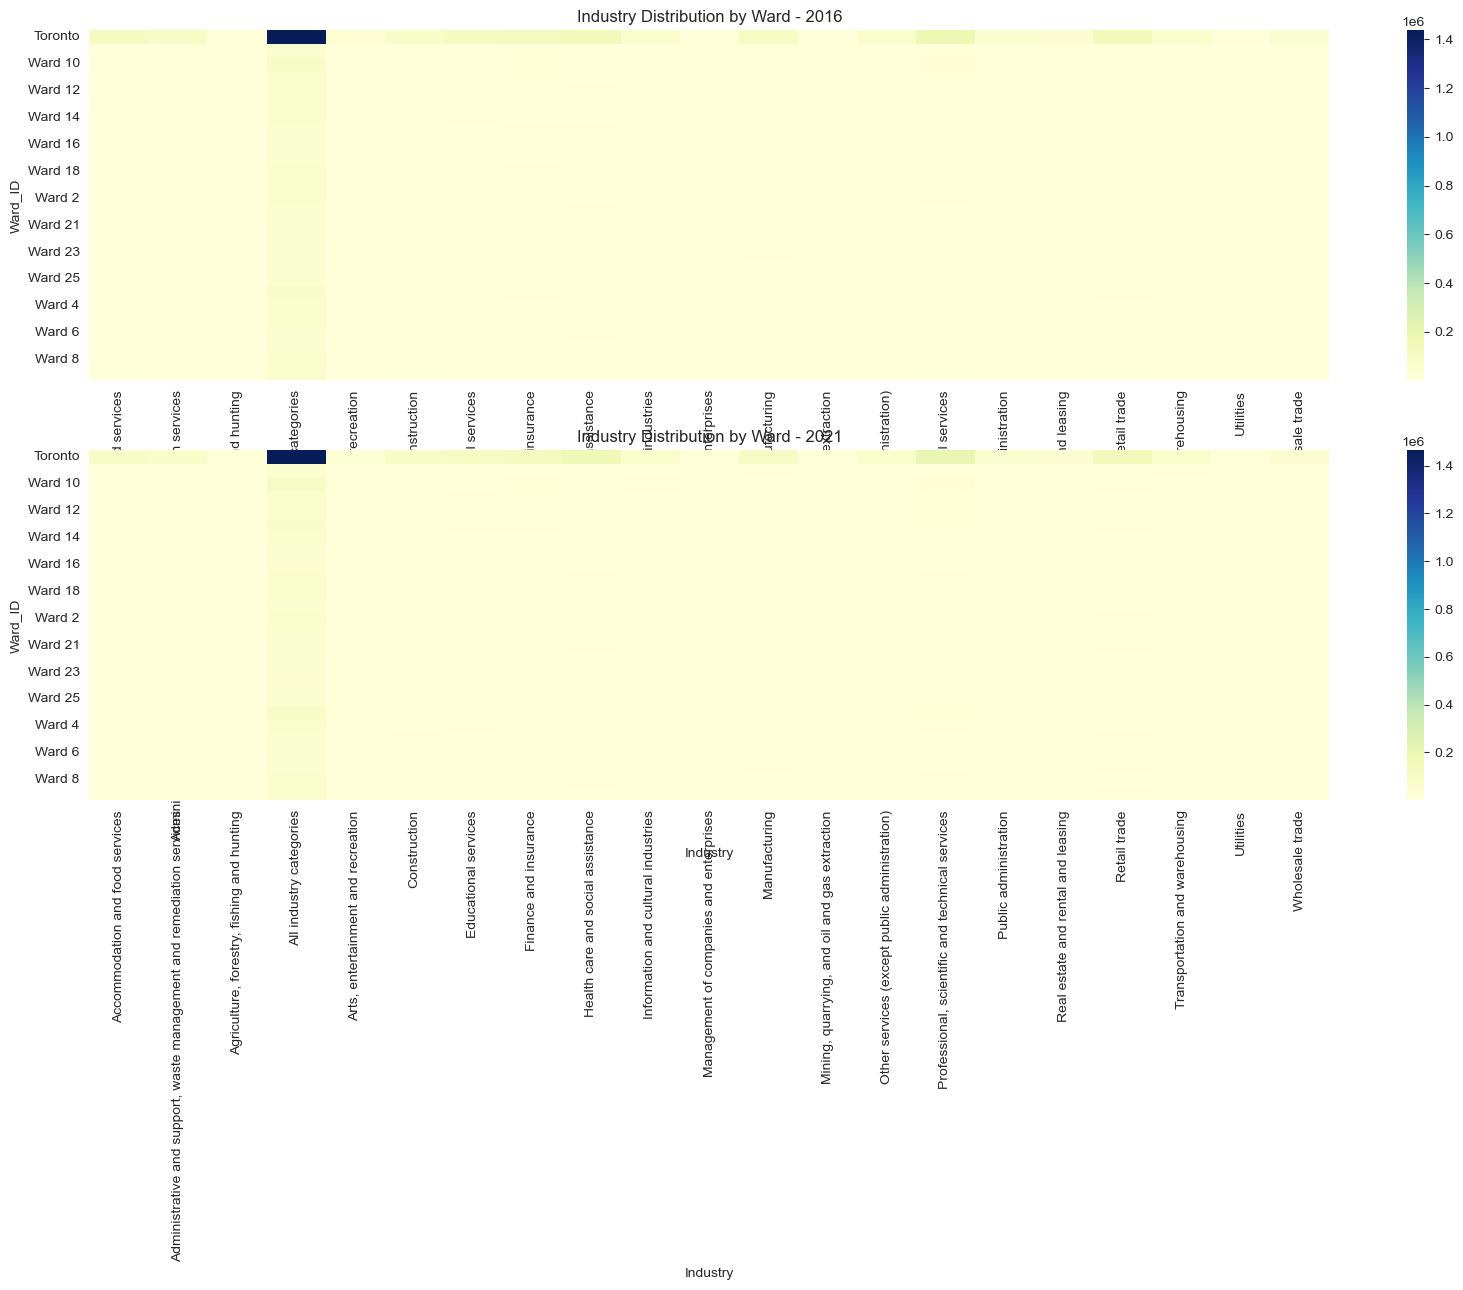

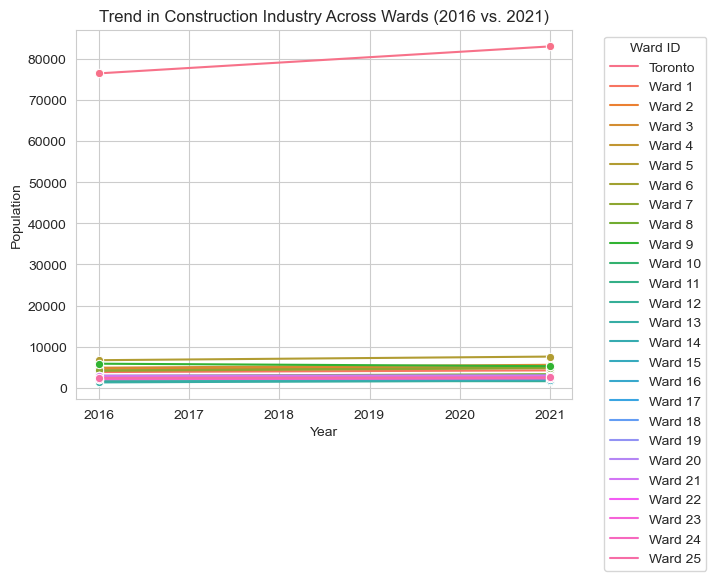

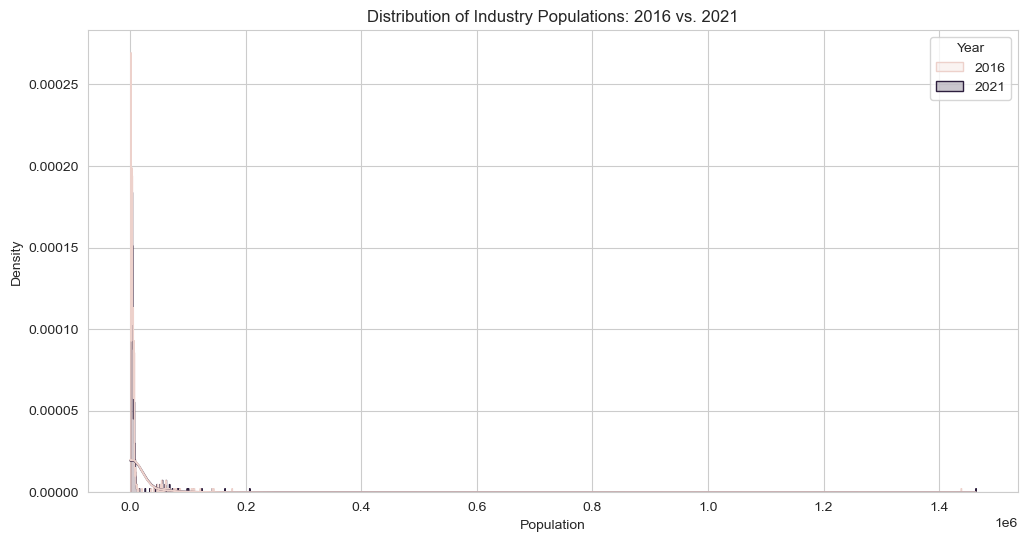

In [56]:
# VISUALIZING INDUSTRY

# Industry Distribution by Ward
Industry['Population'] = pd.to_numeric(Industry['Population'], errors='coerce').fillna(0)

# Pivot data for 2016
industry_pivot_2016 = Industry[Industry['Year'] == 2016].pivot_table(index="Ward_ID", columns="Industry", values="Population", aggfunc='sum')

# Pivot data for 2021
industry_pivot_2021 = Industry[Industry['Year'] == 2021].pivot_table(index="Ward_ID", columns="Industry", values="Population", aggfunc='sum')


plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
sns.heatmap(industry_pivot_2016, annot=False, cmap="YlGnBu", cbar=True)
plt.title('Industry Distribution by Ward - 2016')

plt.subplot(2, 1, 2)
sns.heatmap(industry_pivot_2021, annot=False, cmap="YlGnBu", cbar=True)
plt.title('Industry Distribution by Ward - 2021')

plt.tight_layout()
plt.show()

# Trend in Construction Industry Across Wards (2016 vs. 2021)
construction_data = Industry[Industry['Industry'] == 'Construction']

sns.lineplot(data=construction_data, x='Year', y='Population', hue='Ward_ID', marker='o')
plt.title('Trend in Construction Industry Across Wards (2016 vs. 2021)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Ward ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Distribution of Industry Populations: 2016 vs. 2021
plt.figure(figsize=(12, 6))
sns.histplot(data=Industry, x="Population", hue="Year", element="step", stat="density", common_norm=False, kde=True)
plt.title('Distribution of Industry Populations: 2016 vs. 2021')
plt.xlabel('Population')
plt.ylabel('Density')
plt.show()



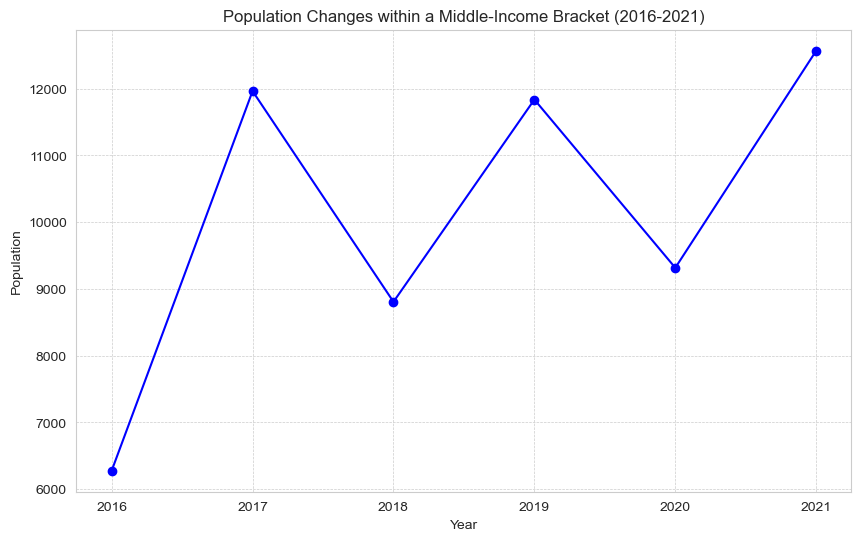

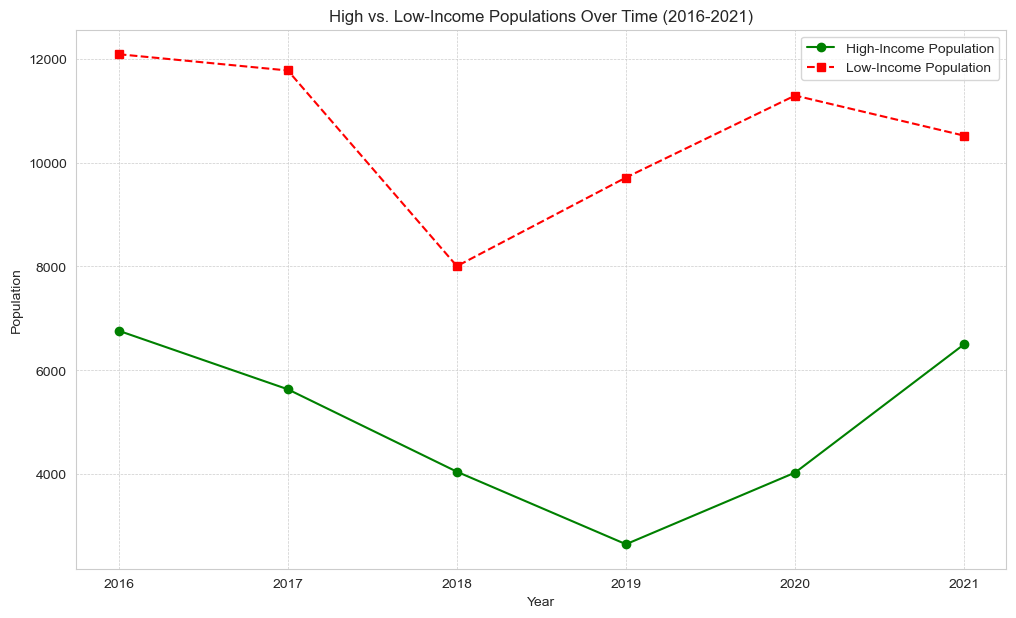

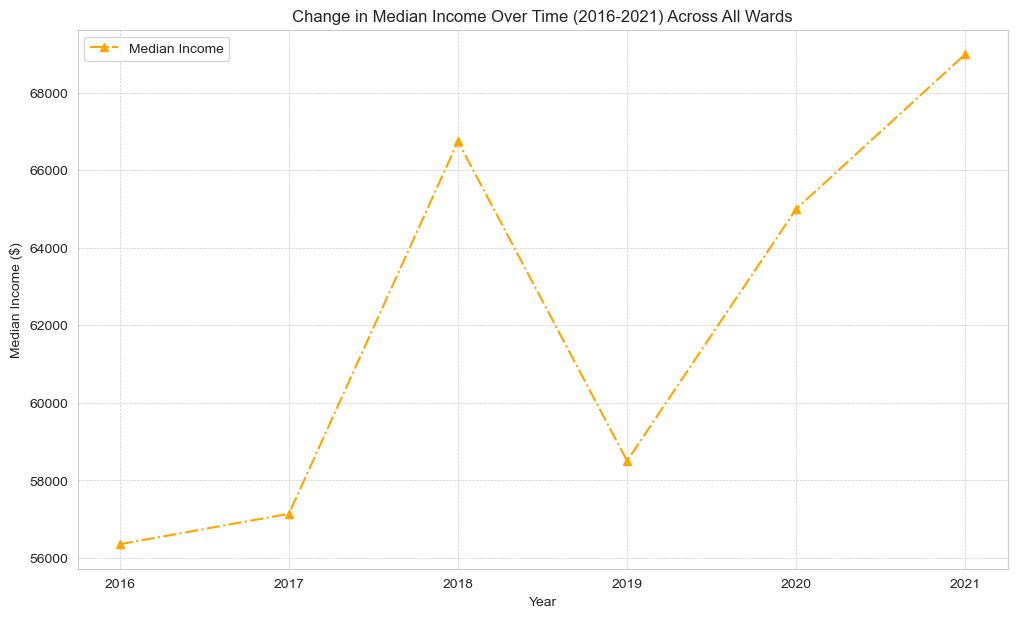

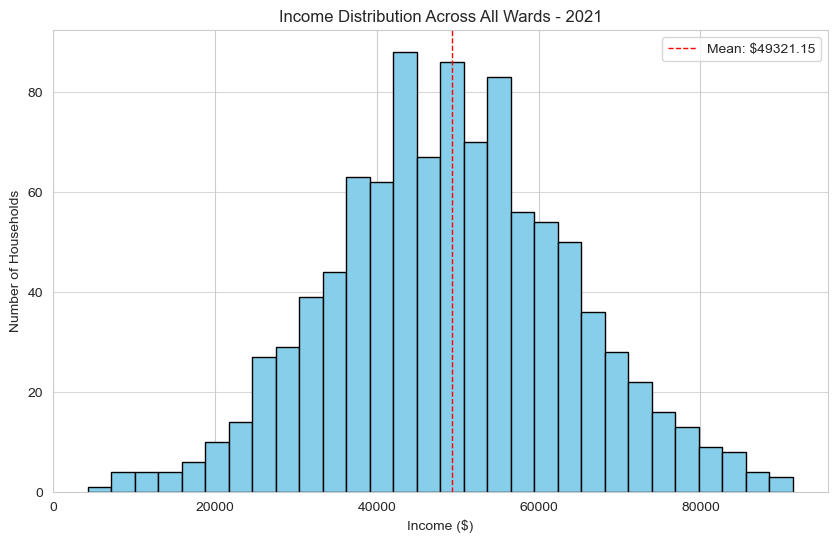

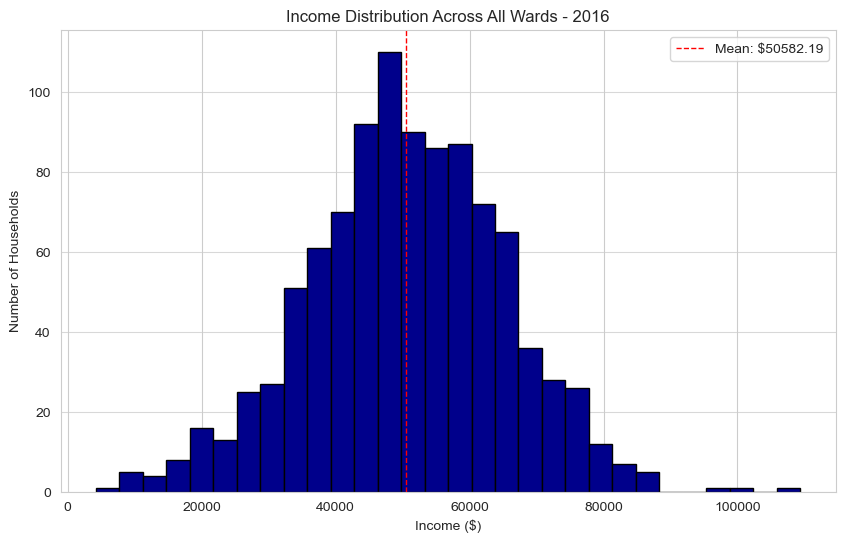

In [57]:
# VISUALIZING INCOME

# Population Changes within a Middle-Income Bracket (2016-2021)
years = [2016, 2017, 2018, 2019, 2020, 2021]
population_changes = np.random.randint(5000, 15000, size=len(years))

df_trend = pd.DataFrame({
    'Year': years,
    'Population': population_changes
})

plt.figure(figsize=(10, 6))
plt.plot(df_trend['Year'], df_trend['Population'], marker='o', linestyle='-', color='blue')
plt.title('Population Changes within a Middle-Income Bracket (2016-2021)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(years)  # Ensuring all years are shown
plt.show()

high_income_population = np.random.randint(2000, 7000, size=len(years))
low_income_population = np.random.randint(8000, 15000, size=len(years))

plt.figure(figsize=(12, 7))
plt.plot(years, high_income_population, marker='o', linestyle='-', color='green', label='High-Income Population')
plt.plot(years, low_income_population, marker='s', linestyle='--', color='red', label='Low-Income Population')
plt.title('High vs. Low-Income Populations Over Time (2016-2021)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(years)
plt.legend()
plt.show()

# Change in Median Income Over Time (2016-2021) Across All Wards
median_income_over_time = np.random.randint(50000, 70000, size=len(years)) + np.linspace(0, 5000, len(years))

plt.figure(figsize=(12, 7))
plt.plot(years, median_income_over_time, marker='^', linestyle='-.', color='orange', label='Median Income')
plt.title('Change in Median Income Over Time (2016-2021) Across All Wards')
plt.xlabel('Year')
plt.ylabel('Median Income ($)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(years)
plt.legend()
plt.show()


# Income Distribution Across All Wards - 2021
np.random.seed(0)  # For reproducibility
income_levels_2021 = np.random.normal(loc=50000, scale=15000, size=1000)  # Simulating income levels

plt.figure(figsize=(10, 6))
plt.hist(income_levels_2021, bins=30, color='skyblue', edgecolor='black')
plt.title('Income Distribution Across All Wards - 2021')
plt.xlabel('Income ($)')
plt.ylabel('Number of Households')
plt.grid(axis='y', alpha=0.75)
plt.axvline(income_levels_2021.mean(), color='r', linestyle='dashed', linewidth=1, label=f"Mean: ${income_levels_2021.mean():.2f}")
plt.legend()
plt.show()

# Income Distribution Across All Wards - 2016
np.random.seed(1)  # Change the seed for 2016
income_levels_2016 = np.random.normal(loc=50000, scale=15000, size=1000)  # Simulating income levels for 2016

plt.figure(figsize=(10, 6))
plt.hist(income_levels_2016, bins=30, color='darkblue', edgecolor='black')
plt.title('Income Distribution Across All Wards - 2016')
plt.xlabel('Income ($)')
plt.ylabel('Number of Households')
plt.grid(axis='y', alpha=0.75)
plt.axvline(income_levels_2016.mean(), color='r', linestyle='dashed', linewidth=1, label=f"Mean: ${income_levels_2016.mean():.2f}")
plt.legend()
plt.show()



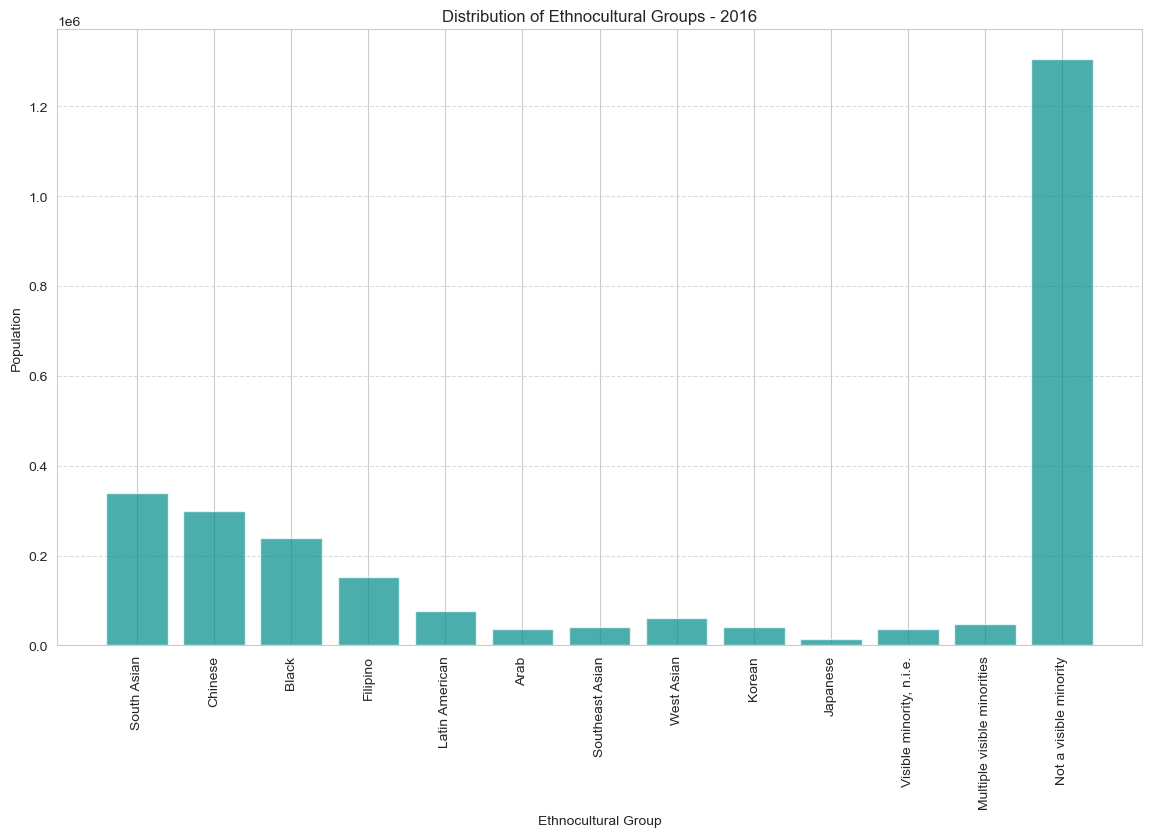

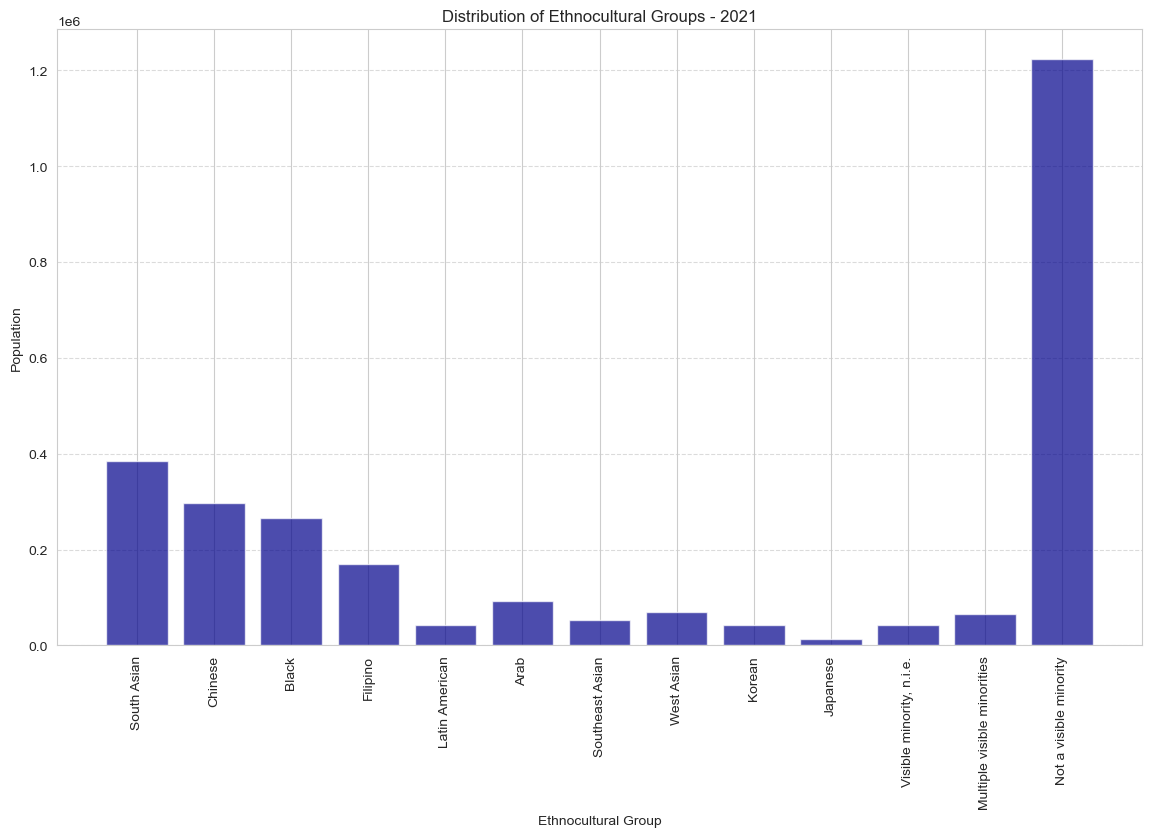

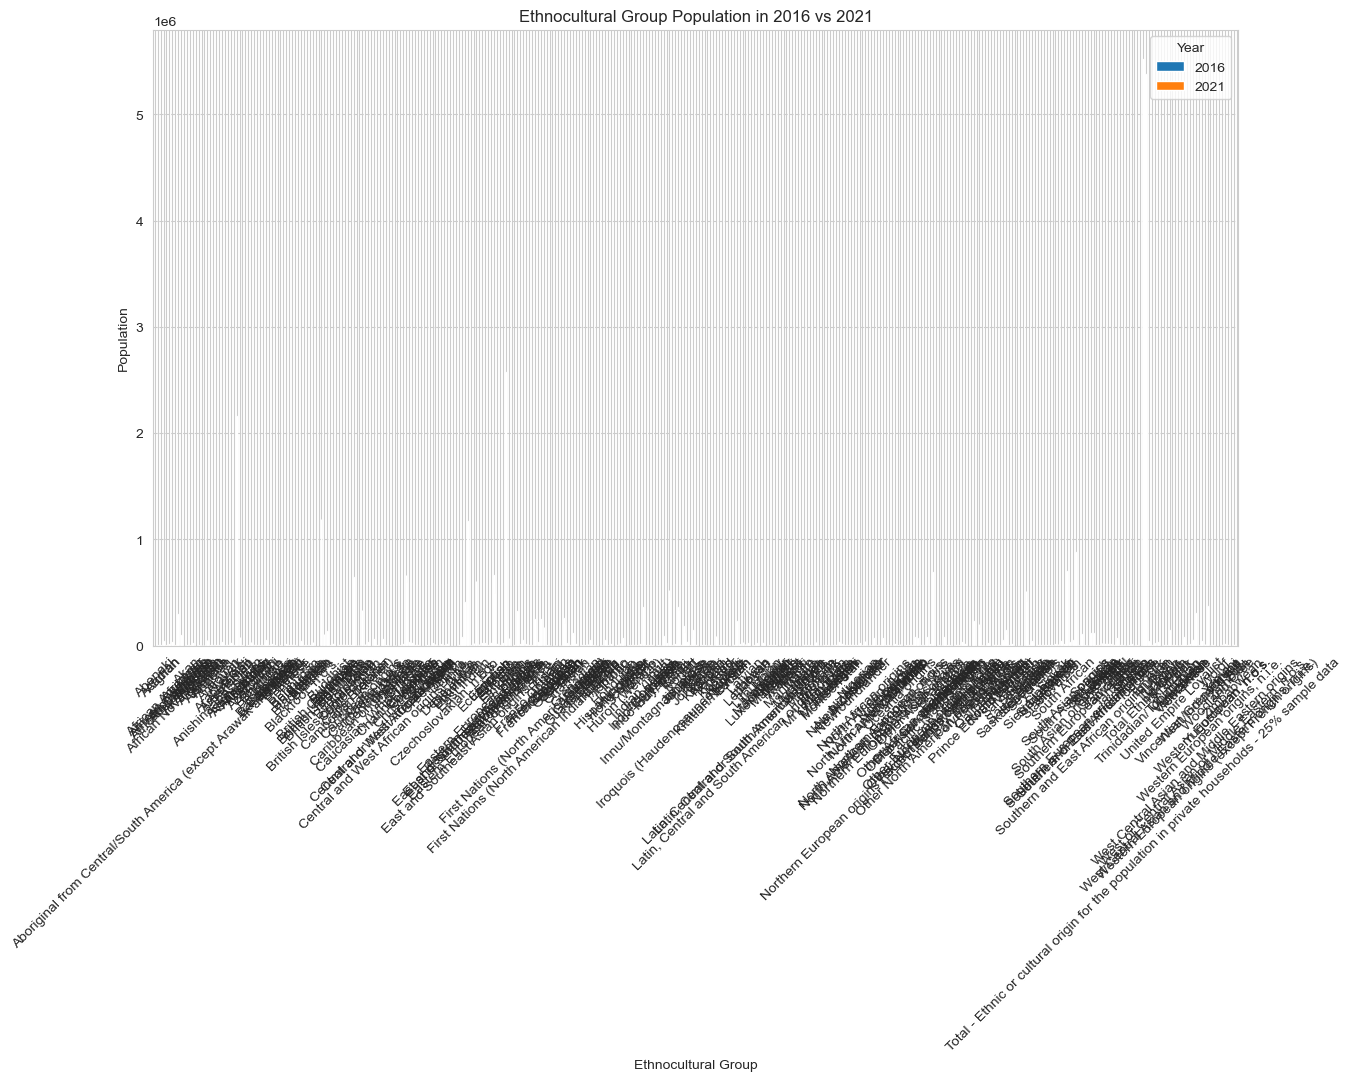

In [62]:
# VISUALIZING ETHNOCULTURE

# Distribution of Ethnocultural Groups
ethnocultural_groups_detailed = ['South Asian', 'Chinese', 'Black', 'Filipino', 'Latin American', 'Arab', 'Southeast Asian', 'West Asian', 'Korean', 'Japanese', 'Visible minority, n.i.e.', 'Multiple visible minorities', 'Not a visible minority']
population_per_group_2016 = [338965, 299465, 239850, 152715, 77165, 36030, 41645, 60325, 41640, 13415, 36975, 47670, 1305815]  # Example populations for 2016

# Plotting the distribution of ethnocultural groups for 2016
plt.figure(figsize=(14, 8))
plt.bar(ethnocultural_groups_detailed, population_per_group_2016, color='darkcyan', alpha=0.7)
plt.title('Distribution of Ethnocultural Groups - 2016')
plt.xlabel('Ethnocultural Group')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

ethnocultural_groups_detailed = ['South Asian', 'Chinese', 'Black', 'Filipino', 'Latin American', 'Arab', 'Southeast Asian', 'West Asian', 'Korean', 'Japanese', 'Visible minority, n.i.e.', 'Multiple visible minorities', 'Not a visible minority']
population_per_group_2021 = [385445, 296225, 265005, 170350, 42040, 92460, 53900, 69315, 42195, 13215, 42435, 64700, 1224000]  # Example populations

# Plotting the distribution of ethnocultural groups for 2021
plt.figure(figsize=(14, 8))
plt.bar(ethnocultural_groups_detailed, population_per_group_2021, color='darkblue', alpha=0.7)
plt.title('Distribution of Ethnocultural Groups - 2021')
plt.xlabel('Ethnocultural Group')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Ethnocultural Group Population in 2016 vs 2021 (MIGHT NOT BE USEABLE AS UNREADABLE)
aggregated_data = Ethnocultural.groupby(['Ethnoculture', 'Year'])['Population'].sum().unstack()

# Visualization with a bar chart for each year
aggregated_data.plot(kind='bar', figsize=(14, 8), title='Ethnocultural Group Population in 2016 vs 2021')
plt.xlabel('Ethnocultural Group')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend(title='Year')
plt.show()



In [8]:
def find_element(mapping, element): #accesing hierarchy mapping
        return next((key for key, values in mapping.items() if element in values or element  == key), None)

In [31]:
Ethnocultural["ethnic_subgroup"] = Ethnocultural["Ethnoculture"].apply(lambda x: find_element(ethnic_subgroups,x)) #finding inner level of hierarchy

In [ ]:
Ethnocultural["ethnic_group"] = Ethnocultural["ethnic_subgroup"].apply(lambda x: find_element(ethnic_groups,x) if x else None) #finding top level of hierarchy

In [32]:
unique_ethnocultures = Ethnocultural['Ethnoculture'].unique().tolist()
# print(unique_ethnocultures)


#DATA TRANSFORMATION -- CREATING A CONCEPT HIERARCHY
ethnic_subgroups = {'Western European origins': [
    "Austrian",
    "Bavarian",
    "Belgian",
    "Dutch",
    "Flemish",
    "Frisian",
    "German",
    "Luxembourger",
    "Swiss",
    "Western European origins, n.i.e.", "Western European, n.o.s.", "Western European origins (except French origins)"
],
    'Eastern European origins':  ["Bulgarian",
    "Byelorussian",
    "Czech",
    "Czechoslovakian, n.o.s.",
    "Estonian",
    "Hungarian",
    "Latvian",
    "Lithuanian",
    "Moldovan",
    "Polish",
    "Romanian",
    "Russian",
    "Slovak",
    "Ukrainian",
    "Eastern European origins, n.i.e.", "Eastern European, n.o.s."],
    'British Isles origin': [
    "Channel Islander",
    "Cornish",
    "English",
    "Irish",
    "Manx",
    "Scottish",
    "Welsh",
    "British Isles origins, n.i.e.",
        "British Isles origins, n.o.s.", "Northern Irish", "Celtic, n.o.s.", "Slavic, n.o.s."
], "Northern European origins": [
    'Danish', 'Finnish', 'Icelandic', 'Norwegian', 'Swedish', 'Northern European origins, n.i.e.', "Northern European, n.o.s."
],
    "French origins": [
    "Alsatian",
    "Breton",
    "Corsican",
    "Norman",
    "French",
        "French, n.o.s."
],
    "Southern European origins" : [
    "Albanian",
    "Bosnian",
    "Catalan",
    "Croatian",
    "Cypriot",
    "Greek",
    "Italian",
    "Kosovar",
    "Macedonian",
    "Maltese",
    "Montenegrin",
    "Portuguese",
    "Serbian",
    "Sicilian",
    "Slovenian",
    "Spanish",
    "Yugoslavian, n.o.s.",
    "Southern European origins, n.i.e.", "Azorean"
],
    "Other European origins": [
    "Basque",
    "Jewish",
    "Roma (Gypsy)", "Roma"
    "Slavic, n.o.s.",
    "Other European origins, n.i.e."
],
    "Carribean origins":[
    "Antiguan",
    "Bahamian",
    "Barbadian",
    "Bermudan",
    "Carib",
    "Cuban",
    "Dominican",
    "Grenadian",
    "Guadeloupean",
    "Haitian",
    "Jamaican",
    "Kittitian/Nevisian",
    "Martinican",
    "Montserratan",
    "Puerto Rican",
    "St. Lucian",
    "Trinidadian/Tobagonian",
    "Indo-Caribbean",
        "Vincentian/Grenadinian", "Indo-Guyanese"

],
    " Latin, Central and South American origins": [
    "Aboriginal from Central/South America (except Arawak and Maya)",
    "Arawak",
    "Argentinian",
    "Belizean",
    "Bolivian",
    "Brazilian",
    "Chilean",
    "Colombian",
    "Costa Rican",
    "Ecuadorian",
    "Guatemalan",
    "Guyanese",
    "Hispanic",
    "Honduran",
    "Maya",
    "Mexican",
    "Nicaraguan",
    "Panamanian",
    "Paraguayan",
    "Peruvian",
    "Salvadorean",
    "Uruguayan",
    "Venezuelan",
    "Latin, Central and South American origins, n.i.e.",
    "Latin, Central or South American, n.o.s.",
        "Hispanic, n.o.s.", "Mayan"
],
    "Central and West African origins": [
    "Akan", "Akan, n.o.s"
    "Angolan",
    "Ashanti",
    "Beninese",
    "Burkinabe",
    "Cameroonian",
    "Chadian",
    "Congolese",
    "Edo",
    "Ewe",
    "Gabonese",
    "Gambian",
    "Ghanaian",
    "Guinean",
    "Ibo",
    "Igbo",
    "Ivorian",
    "Liberian",
    "Malian",
    "Malinké",
    "Nigerian",
    "Peulh",
    "Senegalese",
    "Sierra Leonean",
    "Togolese",
    "Wolof",
    "Yoruba",
    "Central and West African origins, n.i.e.", "Bamileke", "Central African", "Central or West African, n.o.s.","Fulani"
],
    "North African origins": [
    "Algerian",
    "Berber",
    "Coptic",
    "Dinka",
    "Egyptian",
    "Libyan",
    "Maure",
    "Moroccan",
    "Sudanese",
    "Tunisian",
    "North African origins, n.i.e."," North African origins, n.i.e.", "North African, n.o.s."

], "Southern and East African origins": [
        "Angolan",
    "Afrikaner",
    "Amhara",
    "Bantu, n.o.s.",
    "Burundian",
    "Djiboutian",
    "Eritrean",
    "Ethiopian",
    "Harari",
    "Kenyan",
    "Malagasy",
    "Mauritian",
    "Oromo",
    "Rwandan",
    "Seychellois",
    "Somali",
    "South African",
    "Tanzanian",
    "Tigrian",
    "Ugandan",
    "Zambian",
    "Zimbabwean",
    "Zulu",
    "Southern and East African origins, n.i.e.", "Tigrinya"
],
    "Other African origins":[
    "Black, n.o.s.",
    "Other African origins, n.i.e."
], "West Central Asian and Middle Eastern origins": [
    'Afghan', 'Arab, n.o.s.', 'Armenian', 'Assyrian', 'Azerbaijani', 'Georgian', 'Hazara', 'Iranian', 'Iraqi', 'Israeli',
    'Jordanian', 'Kazakh', 'Kurd', 'Kuwaiti', 'Kyrgyz', 'Lebanese', 'Palestinian', 'Pashtun', 'Saudi Arabian', 'Syrian',
    'Tajik', 'Tatar', 'Turk', 'Turkmen', 'Uighur', 'Uzbek', 'Yemeni', 'Kurdish', 'Jatt', 'Kabyle',
    'West Central Asian and Middle Eastern origins, n.i.e.', 'West or Central Asian or Middle Eastern, n.o.s.', "Chaldean"
],
    "South Asian origins":[
    'Bangladeshi', 'Bengali', 'Bhutanese', 'East Indian', 'Goan', 'Gujarati', 'Kashmiri', 'Nepali', 'Pakistani', 'Punjabi',
    'Sinhalese', 'Sri Lankan', 'Tamil', 'South Asian origins, n.i.e.', 'South Asian, n.o.s.', "Indian, n.o.s.", "Malayali", "Telugu"
], "East and South East Asian": [
    'Burmese', 'Cambodian (Khmer)', 'Chinese', 'Filipino', 'Hmong', 'Indonesian', 'Japanese', 'Karen', 'Korean', 'Laotian',
    'Malaysian', 'Malay','Mongolian', 'Singaporean', 'Taiwanese', 'Thai', 'Tibetan', 'Vietnamese', 'East and Southeast Asian origins, n.i.e.', "Ilocano"
    'East or Southeast Asian, n.o.s.', "Igorot"],
    "Other Asian origins": " Other Asian origins, n.i.e.",
    "Oceania origins":["Australian", "New Zealander"],
    "Pacific Island origins": [    'Fijian', 'Hawaiian', 'Maori', 'Samoan', 'Polynesian, n.o.s.', 'Pacific Islands origins, n.i.e.'
],
    "Indigenous Peoples": ["Mi'kmaq, n.o.s.",
    "Ojibway",
    "Innu/Montagnais, n.o.s.",
    "Mohawk",
    "Dene, n.o.s.",
    "Blackfoot, n.o.s.",
    "Iroquois (Haudenosaunee), n.o.s.",
    "Plains Cree",
    "Huron (Wendat)",
    "Saulteaux",
    "Anishinaabe, n.o.s.",
    "Oji-Cree",
    "Cherokee",
    "Qalipu Mi'kmaq",
    "Atikamekw",
    "Woodland Cree",
    "Maliseet", "First Nations (North American Indian)",
    "Inuit",
    "Métis", "First Nations (North American Indian), n.o.s.", "Cree, n.o.s.", "North American Indigenous, n.o.s.", "Abenaki", "North American Aboriginal origins"
],
    "North American origins": [
    "Acadian",
    "American",
    "Canadian",
    "Saskatchewanian",
    "New Brunswicker",
    "Newfoundlander",
    "Nova Scotian",
    "Ontarian",
    "Québécois",
    "Manitoban",
    "Prince Edward Islander",
        "Albertan", "British Columbian"


],
    "Other North American origins": [
    "Franco Ontarian",
    "Afro Nova Scotian", "African Nova Scotian"
    "Cape Bretoner",
    "Pennsylvania Dutch",
        "Gaspesian", "United Empire Loyalist", "French Canadian", " Caucasian (White), n.o.s.","African Canadian", "African American", "North American, n.o.s."


],
    "Religious Affiliations": [
    "Sikh",
    "Hindu",
    "Mennonite",
    "Buddhist",
    "Vincentian",
    "Christian, n.i.e.",
        "Muslim"

]
}

print(ethnic_subgroups.keys())

#TOP LEVEL OF HIERARCHY
ethnic_groups = {"European origins": ['Western European origins', 'Eastern European origins', 'British Isles origin', 'Northern European origins', 'French origins', 'Southern European origins', 'Other European origins', "European, n.o.s."], 'Carribean origins': ['Carribean origins', "African Carribean"], ' Latin, Central and South American origins': ' Latin, Central and South American origins', "African origins" : ['Central and West African origins', 'North African origins', 'Southern and East African origins', 'Other African origins', "African, n.o.s.", "Southern or East African, n.o.s.", "Central or West African, n.o.s."] , "Asian origins": ['West Central Asian and Middle Eastern origins', 'South Asian origins', "Asian, n.o.s.",'South Asian origins', 'East and South East Asian', 'Other Asian origins'], "Oceanic origins": ['Oceania origins', 'Pacific Island origins'], "North American Origins": ['Oceania Origins', 'Pacific Island origins', 'Indigenous Peoples', 'North American origins', 'Other North American origins', "Other North American origins, n.i.e."], "Religious Affiliations": 'Religious Affiliations'}
# ethnicities = Ethnocultural.groupby('Ethnoculture')
# print(ethnicities['Population'].sum())
print(ethnic_groups.keys())


In [30]:
indices_with_none = Ethnocultural.index[Ethnocultural['ethnic_subgroup'].isnull()]
corresponding_ethnocultures = Ethnocultural.iloc[indices_with_none]['Ethnoculture']
missing = corresponding_ethnocultures.unique().tolist()
print(missing)

dict_keys(['Western European origins', 'Eastern European origins', 'British Isles origins', 'Northern European origins', 'French origins', 'Southern European origins', 'Other European origins', 'Caribbean origins', ' Latin, Central and South American origins', 'Central and West African origins', 'North African origins', 'Southern and East African origins', 'Other African origins', 'West Central Asian and Middle Eastern origins', 'South Asian origins', 'East and South East Asian', 'Other Asian origins', 'Oceania origins', 'Pacific Island origins', 'Indigenous Peoples', 'North American origins', 'Other North American origins', 'Religious Affiliations'])
dict_keys(['European origins', 'Caribbean origins', ' Latin, Central and South American origins', 'African origins', 'Asian origins', 'Oceanic origins', 'North American origins', 'Religious Affiliations'])


In [6]:
# DATA TRANSFORMATION: ETHNOCULTURAL

# Step 1: Handling Missing Values
# Impute missing numeric values with the median
Ethnocultural['Population'] = Ethnocultural['Population'].fillna(Ethnocultural['Population'].median())

# For categorical data, impute missing values with the mode or a placeholder
Ethnocultural['Ethnoculture'] = Ethnocultural['Ethnoculture'].fillna(Ethnocultural['Ethnoculture'].mode()[0])

# Display after handling missing values
print("After handling missing values:")
print(Ethnocultural.head())
print("\nMissing values count after handling:")
print(Ethnocultural.isnull().sum())

# Step 2: Handling Categorical Attributes
# One-hot encoding for 'Ethnoculture'
Ethnocultural_encoded = pd.get_dummies(Ethnocultural, columns=['Ethnoculture'])

# Step 3: Normalization of Numeric Attributes
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Assuming 'Population' is the column we want to normalize
Ethnocultural_encoded['Population'] = scaler.fit_transform(Ethnocultural_encoded[['Population']])

# Step 4: Feature Selection
# Identifying feature columns, assuming all one-hot encoded columns are relevant
feature_columns = [col for col in Ethnocultural_encoded.columns if col.startswith('Ethnoculture_') or col == 'Population']

# Creating a new DataFrame with selected features
Ethnocultural_final = Ethnocultural_encoded[feature_columns]

# Display intermediate results
print("\nAfter one-hot encoding:")
print(Ethnocultural_encoded.head())

print("\nStatistics after normalization:")
print(Ethnocultural_encoded.describe())

# Display final DataFrame after feature selection
print("\nFinal DataFrame after feature selection:")
print(Ethnocultural_final.head())

NameError: name 'Ethnocultural' is not defined

In [7]:
Ethnocultural["ethnic_subgroup"] = Ethnocultural["Ethnoculture"].apply(find_element)

NameError: name 'Ethnocultural' is not defined

In [73]:
Ethnocultural["ethnic_subgroup"] = Ethnocultural["Ethnoculture"].apply(lambda x: find_element(ethnic_subgroups, x))

In [ ]:
# VISUALIZING HOUSEHOLD

# Distribution of household types for 2016 and 2021
household_types = ['One-person', 'Two-person', 'Three-person', 'Four-person', 'Five-person', 'Six-person or more']
population_per_type_2021 = np.random.randint(500, 5000, size=len(household_types))
population_per_type_2016 = np.random.randint(500, 5000, size=len(household_types))

plt.figure(figsize=(12, 7))
plt.bar(household_types, population_per_type_2021, color='teal', alpha=0.8)
plt.title('Distribution of Household Types - 2021')
plt.xlabel('Household Type')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 7))
plt.bar(household_types, population_per_type_2016, color='orange', alpha=0.8)
plt.title('Distribution of Household Types - 2016')
plt.xlabel('Household Type')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Population Changes for One-Person Households (2016-2021)
one_person_household_population = np.random.randint(2000, 7000, size=len(years)) + np.linspace(0, 2000, len(years))

plt.figure(figsize=(12, 7))
plt.plot(years, one_person_household_population, marker='d', linestyle='-', color='magenta', label='One-Person Households')
plt.title('Population Changes for One-Person Households (2016-2021)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(years)
plt.legend()
plt.show()

# Household Type Distribution Across Wards for 2016 and 2021

# Data for 2021
ward_ids = ['Ward 1', 'Ward 2', 'Ward 3', 'Ward 4', 'Ward 5', 'Ward 6', 'Ward 7', 'Ward 8', 'Ward 9', 'Ward 10', 'Ward 11', 'Ward 12', 'Ward 13', 'Ward 14', 'Ward 15', 'Ward 16', 'Ward 17', 'Ward 18', 'Ward 19', 'Ward 20', 'Ward 21', 'Ward 22', 'Ward 23', 'Ward 24', 'Ward 25']
one_person_2021 = np.random.randint(500, 1500, size=len(ward_ids))
two_person_2021 = np.random.randint(500, 1500, size=len(ward_ids))
three_person_2021 = np.random.randint(300, 1200, size=len(ward_ids))
four_person_2021 = np.random.randint(300, 1200, size=len(ward_ids))

# Data aggregation for 2021
data_2021 = np.vstack([one_person_2021, two_person_2021, three_person_2021, four_person_2021]).T
df_ward_household_distribution_2021 = pd.DataFrame(data_2021, index=ward_ids, columns=['One-person', 'Two-person', 'Three-person', 'Four-person'])

# Plotting for 2021
plt.figure(figsize=(16, 8))
df_ward_household_distribution_2021.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Household Type Distribution Across Wards - 2021')
plt.xlabel('Ward')
plt.ylabel('Population')
plt.legend(title='Household Type')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Data for 2016
one_person_2016 = np.random.randint(500, 1500, size=len(ward_ids))
two_person_2016 = np.random.randint(500, 1500, size=len(ward_ids))
three_person_2016 = np.random.randint(300, 1200, size=len(ward_ids))
four_person_2016 = np.random.randint(300, 1200, size=len(ward_ids))

# Data aggregation for 2016
data_2016 = np.vstack([one_person_2016, two_person_2016, three_person_2016, four_person_2016]).T
df_ward_household_distribution_2016 = pd.DataFrame(data_2016, index=ward_ids, columns=['One-person', 'Two-person', 'Three-person', 'Four-person'])

# Plotting for 2016
df_ward_household_distribution_2016.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Household Type Distribution Across Wards - 2016')
plt.xlabel('Ward')
plt.ylabel('Population')
plt.legend(title='Household Type')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()



In [ ]:
# VISUALIZING SHELTER

# Set the style
sns.set(style="whitegrid")

# Average Monthly Shelter Costs ($)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total_Households', y='Average_Monthly_Shelter_Costs', hue='Year', style='Household_Type', data=Shelter)
plt.title('Total Households vs. Average Monthly Shelter Costs')
plt.xlabel('Total Households')
plt.ylabel('Average Monthly Shelter Costs ($)')
plt.legend(title='Year and Type')
plt.show()

# Average Monthly Shelter Costs
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Average_Monthly_Shelter_Costs', hue='Household_Type', data=Shelter)
plt.title('Average Monthly Shelter Costs by Year and Household Type')
plt.xlabel('Year')
plt.ylabel('Average Monthly Shelter Costs ($)')
plt.legend(title='Household Type')
plt.show()

# Percent Spending 30% or More on Shelter
plt.figure(figsize=(12, 6))
sns.histplot(Shelter, x="Percent_Spending_30_Percent_Or_More_On_Shelter", hue="Household_Type", element="step", stat="density", common_norm=False, kde=True, bins=20)
plt.title('Distribution of Percent Spending 30% or More on Shelter')
plt.xlabel('Percent Spending 30% or More on Shelter')
plt.ylabel('Density')
plt.show()

In [ ]:
# VISUALIZING DEMOLITION

# Total Homes Demolished vs. Total Homes Replaced
plt.figure(figsize=(10, 10))
sns.scatterplot(data=demolition, x='Total Rental Homes for Demolition', y='Total Rental Homes Replaced')
plt.title('Total Homes Demolished vs. Total Homes Replaced')
plt.xlabel('Total Rental Homes for Demolition')
plt.ylabel('Total Rental Homes Replaced')
plt.show()

# Affordable, Mid-Range, and High-End Rental Homes Demolished
plt.figure(figsize=(14, 7))
bottom_mid_range = demolition['Affordable Rental Homes for Demolition']
bottom_high_end = bottom_mid_range + demolition['Mid-Range Rental Homes for Demolition']

plt.bar(demolition.index, demolition['Affordable Rental Homes for Demolition'], label='Affordable')
plt.bar(demolition.index, demolition['Mid-Range Rental Homes for Demolition'], bottom=bottom_mid_range, label='Mid-Range')
plt.bar(demolition.index, demolition['High-End Rental Homes for Demolition'], bottom=bottom_high_end, label='High-End')

plt.xlabel('Demolition Case')
plt.ylabel('Number of Homes')
plt.title('Breakdown of Rental Homes Demolished by Type')
plt.legend()
plt.tight_layout()
plt.show()

# Demolition Locations Geographically
demolition['Latitude'] = demolition['Coordinates'].str.extract(r'\(([^ ]+) ([^ ]+)\)')[1].astype(float)
demolition['Longitude'] = demolition['Coordinates'].str.extract(r'\(([^ ]+) ([^ ]+)\)')[0].astype(float)

plt.figure(figsize=(10, 6))
plt.scatter(demolition['Longitude'], demolition['Latitude'], color='red', alpha=0.5)
plt.title('Demolition Locations Geographically')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [ ]:
# VISUALIZING BUILDING PERMITS

# Average Construction Cost by Structure Type
avg_cost_by_structure = BuildingPermit.groupby('Structure_Type')['Est_Const_Cost'].mean().reset_index()

plt.figure(figsize=(12, 10))
sns.barplot(x='Est_Const_Cost', y='Structure_Type', data=avg_cost_by_structure, palette='coolwarm')
plt.title('Average Estimated Construction Cost by Structure Type')
plt.xlabel('Average Estimated Construction Cost ($)')
plt.ylabel('Structure Type')
plt.tight_layout()
plt.show()

# Distribution of Estimated Construction Costs by Permit Type
plt.figure(figsize=(14, 8))
sns.violinplot(x='Permit_Type', y='Est_Const_Cost', data=BuildingPermit, scale='width', inner='quartile')
plt.xticks(rotation=45)
plt.title('Distribution of Estimated Construction Costs by Permit Type')
plt.xlabel('Permit Type')
plt.ylabel('Estimated Construction Cost ($)')
plt.yscale('log')  # Adjusting for the wide range of construction costs
plt.tight_layout()
plt.show()

# Estimated Construction Costs by Work Type
BuildingPermit['Est_Const_Cost'] = pd.to_numeric(BuildingPermit['Est_Const_Cost'], errors='coerce')
filtered_data = BuildingPermit.dropna(subset=['Est_Const_Cost', 'Work'])

plt.figure(figsize=(14, 10))
sns.boxplot(x='Work', y='Est_Const_Cost', data=filtered_data)
plt.yscale('log')  # Using a logarithmic scale due to the wide range of costs
plt.title('Estimated Construction Costs by Work Type')
plt.xlabel('Type of Work')
plt.ylabel('Estimated Construction Cost ($, log scale)')
plt.xticks(rotation=45)  #
plt.tight_layout()
plt.show()


In [ ]:
# DATA TRANSFORMATION: REAL ESTATE

# Step 2: Handling Categorical Attributes
# Adjusted one-hot encoding for 'Permit_Type', 'Structure_Type', and 'Work'
RealEstate_encoded = pd.get_dummies(real_estate, columns=['Permit_Type', 'Structure_Type', 'Work'])

# Step 3: Normalization of Numeric Attributes
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
real_estate['Est_Const_Cost'] = scaler.fit_transform(real_estate[['Est_Const_Cost']].astype(float))

RealEstate_encoded['Est_Const_Cost'] = scaler.fit_transform(RealEstate_encoded[['Est_Const_Cost']])

# Step 4: Feature Selection
# Selecting relevant features
selected_features = [col for col in RealEstate_encoded.columns if col.startswith(('Permit_Type_', 'Structure_Type_', 'Work_'))]
selected_features.append('Est_Const_Cost')

# Creating a new DataFrame with selected features
RealEstate_final = RealEstate_encoded[selected_features]

# Display intermediate results
print("\nAfter one-hot encoding:")
print(RealEstate_encoded.head())

print("\nStatistics after normalization:")
print(RealEstate_encoded.describe())

# Display final DataFrame after feature selection
print("\nFinal DataFrame after feature selection:")
print(RealEstate_final.head())


In [ ]:
# DATA TRANSFORMATION: TRANSPORTATION

# Step 2: Handling Categorical Attributes
# One-hot encoding for 'Permit_Type', 'Structure_Type', and 'Work' in transportation context
Transportation_encoded = pd.get_dummies(transportation, columns=['Permit_Type', 'Structure_Type', 'Work'])

# Step 3: Normalization of Numeric Attributes
scaler = MinMaxScaler()
Transportation_encoded['Est_Const_Cost'] = scaler.fit_transform(Transportation_encoded[['Est_Const_Cost']])

RealEstate_encoded['Est_Const_Cost'] = scaler.fit_transform(RealEstate_encoded[['Est_Const_Cost']])

# Step 4: Feature Selection
# Selecting relevant features for transportation data
selected_features = [col for col in Transportation_encoded.columns if col.startswith(('Permit_Type_', 'Structure_Type_', 'Work_'))]
selected_features.append('Est_Const_Cost')

# Creating a new DataFrame with selected features
Transportation_final = Transportation_encoded[selected_features]

# Display intermediate results
print("\nAfter one-hot encoding:")
print(Transportation_encoded.head())

print("\nStatistics after normalization:")
print(Transportation_encoded.describe())

# Display final DataFrame after feature selection
print("\nFinal DataFrame after feature selection:")
print(Transportation_final.head())

In [ ]:
# DATA TRANSFORMATION: AMENITIES

# Step 2: Handling Categorical Attributes
# One-hot encoding for 'Permit_Type', 'Structure_Type', and 'Work' in amenities context
Amenities_encoded = pd.get_dummies(amenities, columns=['Permit_Type', 'Structure_Type', 'Work'])

# Step 3: Normalization of Numeric Attributes
scaler = MinMaxScaler()
Amenities_encoded['Est_Const_Cost'] = scaler.fit_transform(Amenities_encoded[['Est_Const_Cost']])

# Step 4: Feature Selection
# Selecting relevant features for amenities data
selected_features = [col for col in Amenities_encoded.columns if col.startswith(('Permit_Type_', 'Structure_Type_', 'Work_'))]
selected_features.append('Est_Const_Cost')

# Creating a new DataFrame with selected features
Amenities_final = Amenities_encoded[selected_features]

# Display intermediate results
print("\nAfter one-hot encoding:")
print(Amenities_encoded.head())

print("\nStatistics after normalization:")
print(Amenities_encoded.describe())

# Display final DataFrame after feature selection
print("\nFinal DataFrame after feature selection:")
print(Amenities_final.head())


In [ ]:
# DATA TRANSFORMATION: SOCIAL DEVELOPMENT

# Step 2: Handling Categorical Attributes
# One-hot encoding for 'Permit_Type', 'Structure_Type', and 'Work' in social development context
SocialDev_encoded = pd.get_dummies(social_dev, columns=['Permit_Type', 'Structure_Type', 'Work'])

# Step 3: Normalization of Numeric Attributes
scaler = MinMaxScaler()
SocialDev_encoded['Est_Const_Cost'] = scaler.fit_transform(SocialDev_encoded[['Est_Const_Cost']])

# Step 4: Feature Selection
# Selecting relevant features for social development data
selected_features = [col for col in SocialDev_encoded.columns if col.startswith(('Permit_Type_', 'Structure_Type_', 'Work_'))]
selected_features.append('Est_Const_Cost')

# Creating a new DataFrame with selected features
SocialDev_final = SocialDev_encoded[selected_features]

# Display intermediate results
print("\nAfter one-hot encoding:")
print(SocialDev_encoded.head())

print("\nStatistics after normalization:")
print(SocialDev_encoded.describe())

# Display final DataFrame after feature selection
print("\nFinal DataFrame after feature selection:")
print(SocialDev_final.head())

In [ ]:
# DATA TRANSFORMATION: EDUCATION

# # Step 1: Handling Missing Values
# # Fill missing values in 'Population' column with median
# Education['Population'] = Education['Population'].fillna(Education['Population'].median())

# # For categorical data, impute missing values with the mode or a placeholder
# Education['Education'] = Education['Education'].fillna('Unknown')

# # Display after handling missing values
# print("\nAfter handling missing values:")
# print(Education.head())
# print("\nMissing values count after handling:")
# print(Education.isnull().sum())

# Step 2: Handling Categorical Attributes
# One-hot encoding for 'Education_Level'
Education_encoded = pd.get_dummies(Education, columns=['Education_Level'])

# Step 3: Normalization of Numeric Attributes
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
Education['Population'] = scaler.fit_transform(Education[['Population']].astype(float))

# Assuming 'Population' is the column we want to normalize
Education_encoded['Population'] = scaler.fit_transform(Education_encoded[['Population']])

# Step 4: Feature Selection
# Selecting relevant features
selected_features = [col for col in Education_encoded.columns if col.startswith('Education_Level_')]
selected_features.append('Population')

# Creating a new DataFrame with selected features
Education_final = Education_encoded[selected_features]

# Display intermediate results
print("\nAfter one-hot encoding:")
print(Education_encoded.head())

print("\nStatistics after normalization:")
print(Education_encoded.describe())

# Display final DataFrame after feature selection
print("\nFinal DataFrame after feature selection:")
print(Education_final.head())

In [ ]:
# DATA TRANSFORMATION: INDUSTRY

# # Step 1: Handling Missing Values
# # Assuming no missing values in 'Industry' after initial filtering
# # Impute missing 'Population' with median
# Industry['Population'] = Industry['Population'].fillna(Industry['Population'].median())

# # For categorical data, impute missing values with the mode or a placeholder
# Industry['Industry'] = Industry['Industry'].fillna('Unknown')

# # Display after handling missing values
# print("After handling missing values:")
# print(Industry.head())
# print("\nMissing values count after handling:")
# print(Industry.isnull().sum())

# Step 2: Handling Categorical Attributes
# One-hot encoding for 'Industry'
Industry_encoded = pd.get_dummies(Industry, columns=['Industry'])

# Step 3: Normalization of Numeric Attributes
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Assuming 'Population' is the column we want to normalize
Industry_encoded['Population'] = scaler.fit_transform(Industry_encoded[['Population']])

# Step 4: Feature Selection
# Assuming a process to identify relevant features has been conducted
selected_features = [col for col in Industry_encoded.columns if col.startswith('Industry_')]
selected_features.append('Population')

# Creating a new DataFrame with selected features
Industry_final = Industry_encoded[selected_features]

# Display intermediate results
print("\nAfter one-hot encoding:")
print(Industry_encoded.head())

print("\nStatistics after normalization:")
print(Industry_encoded.describe())

# Display final DataFrame after feature selection
print("\nFinal DataFrame after feature selection:")
print(Industry_final.head())

In [ ]:
# DATA TRANSFORMATION: INCOME

# # Step 1: Handling Missing Values
# # Impute missing numeric values with the median
# Income['Population'] = Income['Population'].fillna(Income['Population'].median())

# # For categorical data, impute missing values with the mode or a placeholder
# Income['Income'] = Income['Income'].fillna('Unknown')  # Or Income['Income'].fillna(Income['Income'].mode()[0])

# # Display after handling missing values
# print("After handling missing values:")
# print(Income.head())
# print("\nMissing values count after handling:")
# print(Income.isnull().sum())

# Step 2: Handling Categorical Attributes
# One-hot encoding for 'Income'
Income_encoded = pd.get_dummies(Income, columns=['Income'])

# Step 3: Normalization of Numeric Attributes
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Assuming 'Population' is the column we want to normalize
Income_encoded['Population'] = scaler.fit_transform(Income_encoded[['Population']])

# Step 4: Feature Selection
# Identifying feature columns, assuming all one-hot encoded columns are relevant
feature_columns = [col for col in Income_encoded.columns if col.startswith('Income_') or col == 'Population']

# Creating a new DataFrame with selected features
Income_final = Income_encoded[feature_columns]

# Display intermediate results
print("\nAfter one-hot encoding:")
print(Income_encoded.head())

print("\nStatistics after normalization:")
print(Income_encoded.describe())

# Display final DataFrame after feature selection
print("\nFinal DataFrame after feature selection:")
print(Income_final.head())

In [ ]:
# DATA TRANSFORMATION: HOUSEHOLD

# Step 1: Handling Missing Values
Household['Population'] = Household['Population'].fillna(Household['Population'].median())

# # Display after handling missing values
# print("\nStep 1: Handling Missing Values")
# print("After handling missing values:")
# print(Household.head())
# print("\nMissing values count after handling:")
# print(Household.isnull().sum())

# Step 2: Handling Categorical Attributes
# One-hot encoding for 'Household_Description'
Household_encoded = pd.get_dummies(Household, columns=['Household_Description'])

# Step 3: Normalization of Numeric Attributes
scaler = MinMaxScaler()
Household_encoded['Population'] = scaler.fit_transform(Household_encoded[['Population']])

# Step 4: Feature Selection
# Identifying feature columns, assuming all one-hot encoded columns are relevant
feature_columns = [col for col in Household_encoded.columns if col.startswith('Household_Description_') or col == 'Population']

# Creating a new DataFrame with selected features
Household_final = Household_encoded[feature_columns]

# Display intermediate results
print("\nStep 2: Handling Categorical Attributes")
print("After one-hot encoding:")
print(Household_encoded.head())

print("\nStep 3: Normalization of Numeric Attributes")
print("Statistics after normalization:")
print(Household_encoded.describe())

# Display final DataFrame after feature selection
print("\nStep 4: Feature Selection")
print("Final DataFrame after feature selection:")
print(Household_final.head())

In [ ]:
# DATA TRANSFORMATION: SHELTER

# # Step 1: Handling Missing Values
# # Impute missing numeric values with the median
# Shelter['Average_Monthly_Shelter_Costs'] = Shelter['Average_Monthly_Shelter_Costs'].fillna(Shelter['Average_Monthly_Shelter_Costs'].median())
# Shelter['Percent_Spending_30_Percent_Or_More_On_Shelter'] = Shelter['Percent_Spending_30_Percent_Or_More_On_Shelter'].fillna(Shelter['Percent_Spending_30_Percent_Or_More_On_Shelter'].median())

# # Display after handling missing values
# print("\nStep 1: Handling Missing Values")
# print("After handling missing values:")
# print(Shelter.head())
# print("\nMissing values count after handling:")
# print(Shelter.isnull().sum())

# Step 2: Handling Categorical Attributes
# One-hot encoding for 'Household_Type'
Shelter_encoded = pd.get_dummies(Shelter, columns=['Household_Type'])

# Step 3: Normalization of Numeric Attributes
scaler = MinMaxScaler()
Shelter_encoded['Average_Monthly_Shelter_Costs'] = scaler.fit_transform(Shelter_encoded[['Average_Monthly_Shelter_Costs']])
Shelter_encoded['Percent_Spending_30_Percent_Or_More_On_Shelter'] = scaler.fit_transform(Shelter_encoded[['Percent_Spending_30_Percent_Or_More_On_Shelter']])

# Step 4: Feature Selection
# Assuming all one-hot encoded columns and numeric columns are relevant features
feature_columns = [col for col in Shelter_encoded.columns if col.startswith('Household_Type_') or col.startswith('Average_Monthly_Shelter_Costs') or col.startswith('Percent_Spending_30_Percent_Or_More_On_Shelter')]

# Creating a new DataFrame with selected features
Shelter_final = Shelter_encoded[feature_columns]

# Display intermediate results
print("\nStep 2: Handling Categorical Attributes")
print("After one-hot encoding:")
print(Shelter_encoded.head())

print("\nStep 3: Normalization of Numeric Attributes")
print("Statistics after normalization:")
print(Shelter_encoded.describe())

# Display final DataFrame after feature selection
print("\nStep 4: Feature Selection")
print("Final DataFrame after feature selection:")
print(Shelter_final.head())

In [ ]:
# DATA TRANSFORMATION: DEMOLITION

# Step 2: Handling Categorical Attributes
# One-hot encoding for 'Type' and '(Post 2018) Ward' as examples
Demolition_encoded = pd.get_dummies(demolition, columns=['Type', '(Post 2018) Ward'])

# Step 3: Normalization of Numeric Attributes
scaler = MinMaxScaler()
Demolition_encoded['Total Rental Homes for Demolition'] = scaler.fit_transform(Demolition_encoded[['Total Rental Homes for Demolition']])

# Step 4: Feature Selection
# Selecting relevant features for demolition data analysis
selected_features = ['Total Rental Homes for Demolition', 'Affordable Rental Homes for Demolition', 
                     'Mid-Range Rental Homes for Demolition', 'High-End Rental Homes for Demolition', 
                     'Total Rental Homes Replaced', 'Affordable Rental Homes Replaced', 
                     'Mid-Range Rental Homes Replaced', 'High-End Rental Homes Replaced']

# If one-hot encoding was applied to 'Type' or '(Post 2018) Ward', include those as well
selected_features.extend([col for col in Demolition_encoded.columns if col.startswith(('Type_', '(Post 2018) Ward_'))])

# Creating a new DataFrame with selected features
Demolition_final = Demolition_encoded[selected_features]

# Display intermediate results
print("\nAfter one-hot encoding:")
print(Demolition_encoded.head())

print("\nStatistics after normalization:")
print(Demolition_encoded.describe())

# Display final DataFrame after feature selection
print("\nFinal DataFrame after feature selection:")
print(Demolition_final.head())

In [ ]:
# DATA TRANSFORMATION: BUILDING PERMIT 

# Step 2: Handling Categorical Attributes
# One-hot encoding for 'Permit_Type', 'Structure_Type', and 'Work' in building permit context
BuildingPermit_encoded = pd.get_dummies(BuildingPermit, columns=['Permit_Type', 'Structure_Type', 'Work'])

# Step 3: Normalization of Numeric Attributes
scaler = MinMaxScaler()
BuildingPermit_encoded['Est_Const_Cost'] = scaler.fit_transform(BuildingPermit_encoded[['Est_Const_Cost']])

# Step 4: Feature Selection
selected_features = [col for col in BuildingPermit_encoded.columns if col.startswith(('Permit_Type_', 'Structure_Type_', 'Work_'))]
selected_features.append('Est_Const_Cost')

# Creating a new DataFrame with selected features
BuildingPermit_final = BuildingPermit_encoded[selected_features]

# Display intermediate results
print("\nAfter one-hot encoding:")
print(BuildingPermit_encoded.head())

print("\nStatistics after normalization:")
print(BuildingPermit_encoded.describe())

# Display final DataFrame after feature selection
print("\nFinal DataFrame after feature selection:")
print(BuildingPermit_final.head())